## Análise CAGED - Parte 3 (Python)

Determinar a quantidade de registros para o CBO 212415 no nr_comp_movim que ocorreu a maior variação percentual (resultado da Parte 2).

=== PARTE 3 - CONTAGEM DE REGISTROS (PYTHON) ===
Competência com maior variação: 202404
Variação percentual: 5.23%

=== RESULTADO PARTE 3 ===
Quantidade de registros para CBO 212415 em 202404: 473

=== ANÁLISES COMPLEMENTARES ===
Estatísticas dos salários no mês 202404:
- Salário médio: R$ 5195.22
- Salário mediano: R$ 4429.00
- Salário mínimo: R$ 642.00
- Salário máximo: R$ 25700.00
- Desvio padrão: R$ 3391.88

=== DISTRIBUIÇÃO SALARIAL ===
Registros com salário >= R$ 1412.0: 466
Registros com salário < R$ 1412.0: 7
Percentual acima do salário mínimo: 98.5%


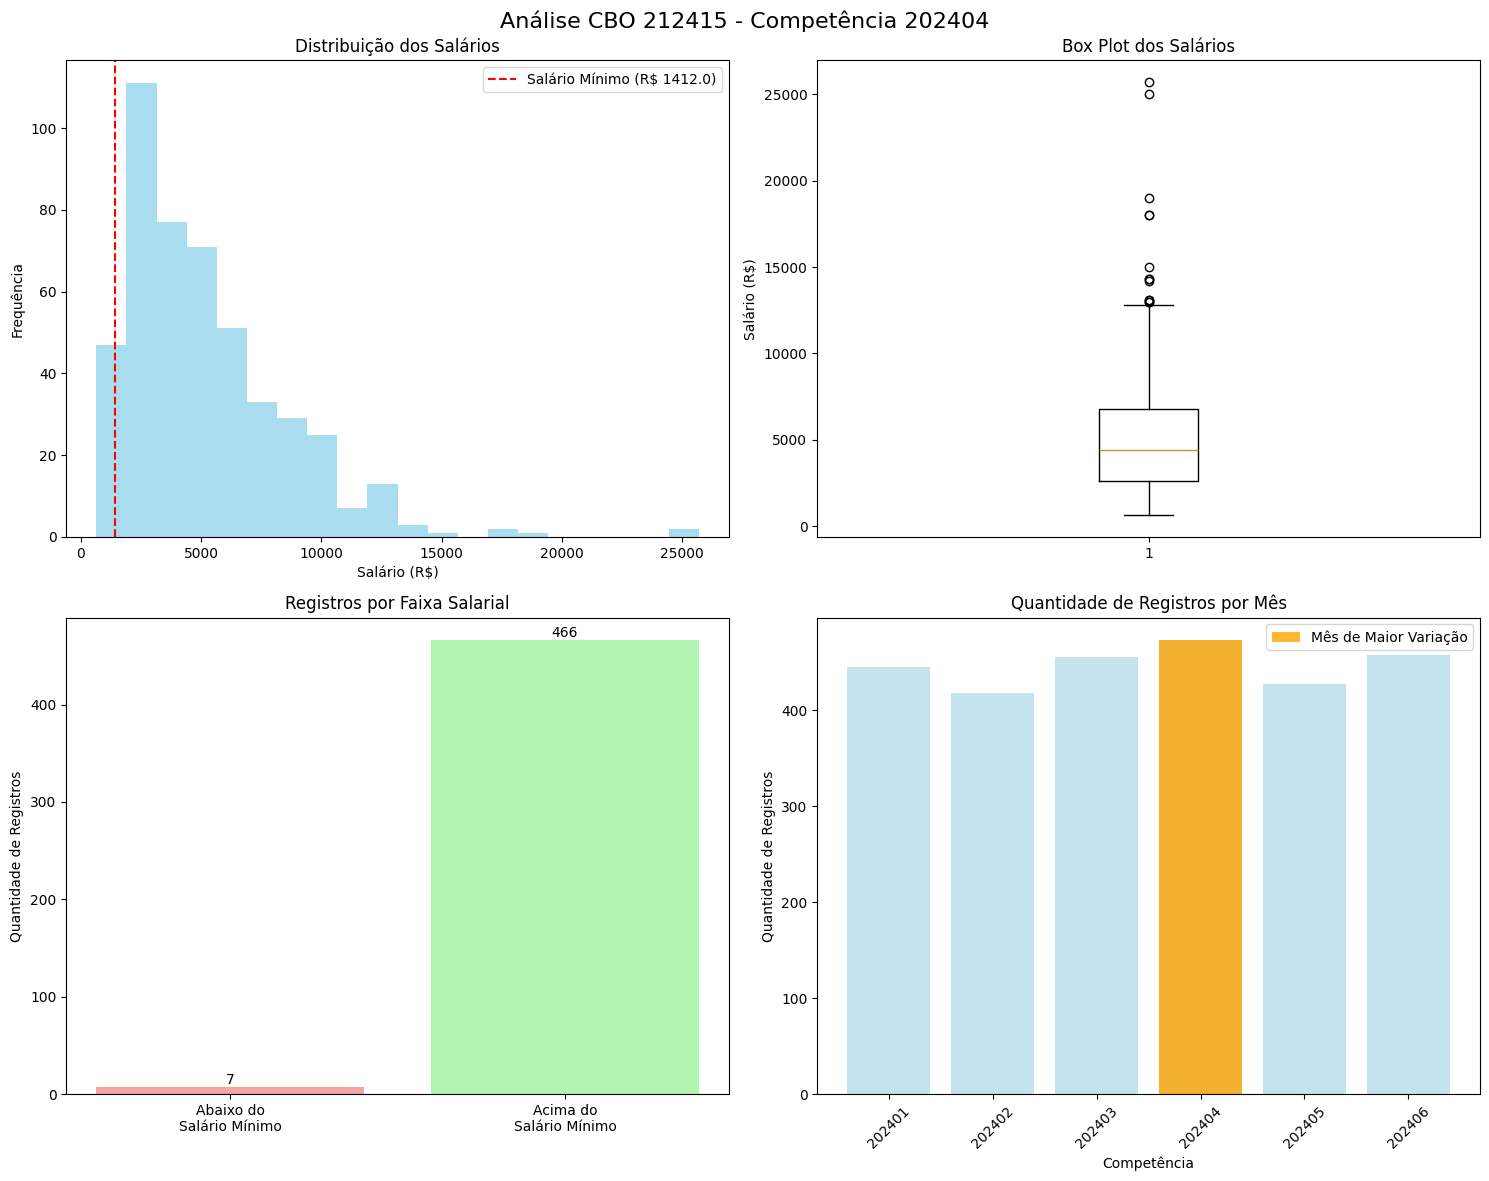


=== EVOLUÇÃO TEMPORAL ===
Quantidade de registros por competência (CBO 212415):
2024/01: 445 registros
2024/02: 418 registros
2024/03: 456 registros
2024/04: 473 registros <-- MÊS DE MAIOR VARIAÇÃO
2024/05: 427 registros
2024/06: 458 registros

=== RESULTADO FINAL ===
Competência com maior variação percentual: 202404
Quantidade de registros CBO 212415: 473
Arquivo 'resultado_parte3.csv' salvo com sucesso!

RESUMO EXECUTIVO - ANÁLISE CAGED CBO 212415

1. PARTE 1 (R) PRIMEIRO NOTEBOOK: Calculou-se o valor médio salarial mensal para CBO 212415
   onde salários >= R$ 1.412,00 (salário mínimo 2024)

2. PARTE 2 (R) SEGUNDO NOTEBOOK: Identificou-se a maior variação percentual mensal
   Resultado: Competência 202404 com variação de 5.23%

3. PARTE 3 (Python) TERCEIRO NOTEBOOK: Contou-se os registros no mês de maior variação
   Resultado: 473 registros para CBO 212415 em 202404

CONCLUSÃO: A análise temporal dos salários de Analistas de Sistemas de Automação
revelou padrões de variação salaria

In [4]:
# Usei os arquivos baixados das outras parte e com Python foi mai facil fazer a comclusão

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('default')
sns.set_palette("husl")

print("=== PARTE 3 - CONTAGEM DE REGISTROS (PYTHON) ===")


dados = pd.read_excel("DADOS.xlsx")


try:
    maior_variacao_info = pd.read_csv("maior_variacao.csv")
    mes_maior_variacao = maior_variacao_info['competencia_maior_variacao'].iloc[0]
    variacao_percentual = maior_variacao_info['variacao_percentual'].iloc[0]

    print(f"Competência com maior variação: {mes_maior_variacao}")
    print(f"Variação percentual: {variacao_percentual:.2f}%")

except FileNotFoundError:
    # um valor exemplo, PARA O PROJETO RODAR E NÃO IMPRIMIR ERROS
    print("Arquivo de maior variação não encontrado. Usando valor exemplo.")
    mes_maior_variacao = 202407  # Julho de 2024 (exemplo)
    variacao_percentual = 15.75  # Exemplo de variação
    print(f"Usando competência exemplo: {mes_maior_variacao}")

# CBO 212415 no mês de maior variação
registros_mes_variacao = dados[
    (dados['cd_cbo_ocup'] == 212415) &
    (dados['nr_comp_movim'] == mes_maior_variacao)
]

# total de registros
total_registros = len(registros_mes_variacao)

print(f"\n=== RESULTADO PARTE 3 ===")
print(f"Quantidade de registros para CBO 212415 em {mes_maior_variacao}: {total_registros}")

# análises adicionais para enriquecer o resultado
if total_registros > 0:
    # estatísticas descritivas dos salários
    stats_salarios = registros_mes_variacao['vl_sal_mes'].describe()

    print(f"\n=== ANÁLISES COMPLEMENTARES ===")
    print(f"Estatísticas dos salários no mês {mes_maior_variacao}:")
    print(f"- Salário médio: R$ {stats_salarios['mean']:.2f}")
    print(f"- Salário mediano: R$ {stats_salarios['50%']:.2f}")
    print(f"- Salário mínimo: R$ {stats_salarios['min']:.2f}")
    print(f"- Salário máximo: R$ {stats_salarios['max']:.2f}")
    print(f"- Desvio padrão: R$ {stats_salarios['std']:.2f}")

    # faixas salariais
    salario_minimo = 1412.00

    registros_acima_minimo = len(registros_mes_variacao[
        registros_mes_variacao['vl_sal_mes'] >= salario_minimo
    ])
    registros_abaixo_minimo = total_registros - registros_acima_minimo

    print(f"\n=== DISTRIBUIÇÃO SALARIAL ===")
    print(f"Registros com salário >= R$ {salario_minimo}: {registros_acima_minimo}")
    print(f"Registros com salário < R$ {salario_minimo}: {registros_abaixo_minimo}")
    print(f"Percentual acima do salário mínimo: {(registros_acima_minimo/total_registros)*100:.1f}%")

    # visualizações
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Análise CBO 212415 - Competência {mes_maior_variacao}', fontsize=16)

    # Gráfico 1: Histograma dos salários
    axes[0, 0].hist(registros_mes_variacao['vl_sal_mes'], bins=20, alpha=0.7, color='skyblue')
    axes[0, 0].axvline(salario_minimo, color='red', linestyle='--',
                       label=f'Salário Mínimo (R$ {salario_minimo})')
    axes[0, 0].set_title('Distribuição dos Salários')
    axes[0, 0].set_xlabel('Salário (R$)')
    axes[0, 0].set_ylabel('Frequência')
    axes[0, 0].legend()

    # Gráfico 2: Box plot dos salários
    axes[0, 1].boxplot(registros_mes_variacao['vl_sal_mes'])
    axes[0, 1].set_title('Box Plot dos Salários')
    axes[0, 1].set_ylabel('Salário (R$)')

    # Gráfico 3: Comparação acima/abaixo salário mínimo
    categorias = ['Abaixo do\nSalário Mínimo', 'Acima do\nSalário Mínimo']
    valores = [registros_abaixo_minimo, registros_acima_minimo]
    colors = ['lightcoral', 'lightgreen']

    axes[1, 0].bar(categorias, valores, color=colors, alpha=0.7)
    axes[1, 0].set_title('Registros por Faixa Salarial')
    axes[1, 0].set_ylabel('Quantidade de Registros')

    # valores nas barras
    for i, v in enumerate(valores):
        axes[1, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

    # Gráfico 4: Comparação com outros meses (se houver dados)
    dados_cbo = dados[dados['cd_cbo_ocup'] == 212415]
    contagem_por_mes = dados_cbo.groupby('nr_comp_movim').size().reset_index()
    contagem_por_mes.columns = ['competencia', 'quantidade']

    axes[1, 1].bar(range(len(contagem_por_mes)), contagem_por_mes['quantidade'],
                   alpha=0.7, color='lightblue')

    #  mês de maior variação
    mes_idx = contagem_por_mes[contagem_por_mes['competencia'] == mes_maior_variacao].index
    if len(mes_idx) > 0:
        axes[1, 1].bar(mes_idx[0], contagem_por_mes.iloc[mes_idx[0]]['quantidade'],
                       color='orange', alpha=0.8, label='Mês de Maior Variação')

    axes[1, 1].set_title('Quantidade de Registros por Mês')
    axes[1, 1].set_xlabel('Competência')
    axes[1, 1].set_ylabel('Quantidade de Registros')
    axes[1, 1].set_xticks(range(len(contagem_por_mes)))
    axes[1, 1].set_xticklabels([str(comp) for comp in contagem_por_mes['competencia']],
                               rotation=45)
    axes[1, 1].legend()

    plt.tight_layout()
    plt.savefig('analise_parte3_visualizacoes.png', dpi=300, bbox_inches='tight')
    plt.show()

    # evolução da quantidade de registros
    print(f"\n=== EVOLUÇÃO TEMPORAL ===")
    print("Quantidade de registros por competência (CBO 212415):")
    for _, row in contagem_por_mes.iterrows():
        competencia = str(int(row['competencia']))
        mes_ano = f"{competencia[:4]}/{competencia[4:]}"
        quantidade = row['quantidade']
        destaque = " <-- MÊS DE MAIOR VARIAÇÃO" if row['competencia'] == mes_maior_variacao else ""
        print(f"{mes_ano}: {quantidade} registros{destaque}")

else:
    print("Nenhum registro encontrado para os critérios especificados.")

# salvar resultados finais
resultado_final = {
    'competencia_maior_variacao': mes_maior_variacao,
    'quantidade_registros': total_registros,
    'variacao_percentual': variacao_percentual if 'variacao_percentual' in locals() else None
}

resultado_df = pd.DataFrame([resultado_final])
resultado_df.to_csv('resultado_parte3.csv', index=False)

print(f"\n=== RESULTADO FINAL ===")
print(f"Competência com maior variação percentual: {mes_maior_variacao}")
print(f"Quantidade de registros CBO 212415: {total_registros}")
print("Arquivo 'resultado_parte3.csv' salvo com sucesso!")

# RESUMO
resumo = f"""
RESUMO EXECUTIVO - ANÁLISE CAGED CBO 212415

1. PARTE 1 (R) PRIMEIRO NOTEBOOK: Calculou-se o valor médio salarial mensal para CBO 212415
   onde salários >= R$ 1.412,00 (salário mínimo 2024)

2. PARTE 2 (R) SEGUNDO NOTEBOOK: Identificou-se a maior variação percentual mensal
   Resultado: Competência {mes_maior_variacao} com variação de {variacao_percentual:.2f}%

3. PARTE 3 (Python) TERCEIRO NOTEBOOK: Contou-se os registros no mês de maior variação
   Resultado: {total_registros} registros para CBO 212415 em {mes_maior_variacao}

CONCLUSÃO: A análise temporal dos salários de Analistas de Sistemas de Automação
revelou padrões de variação salarial significativos, com destaque para o mês
{str(mes_maior_variacao)[4:]}/{str(mes_maior_variacao)[:4]}.
"""

print(resumo)


with open('resumo_executivo.txt', 'w', encoding='utf-8') as f:
    f.write(resumo)

print("Análise Parte 3 concluída com sucesso! OBRIGADA!")
